Distribuția claselor:
 v1
ham     4825
spam     747
Name: count, dtype: int64


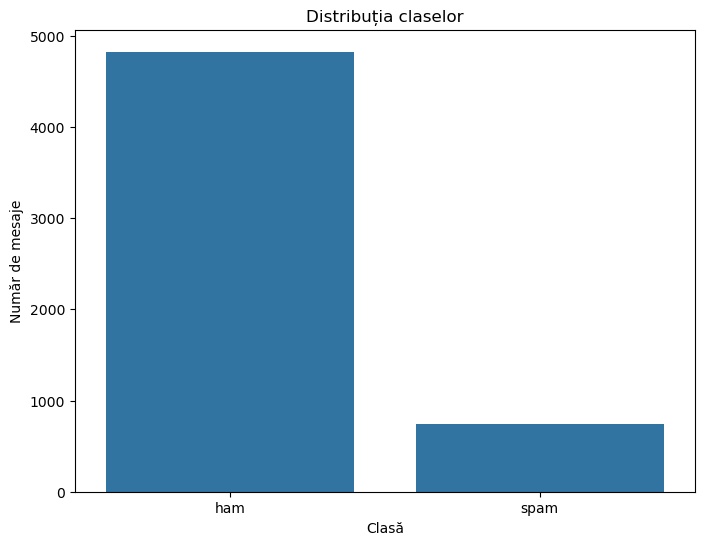

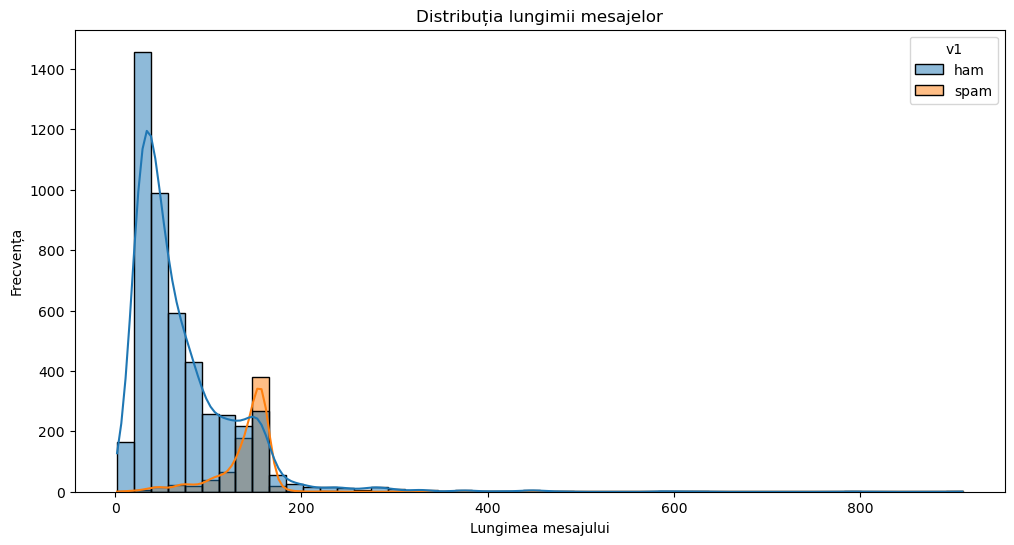

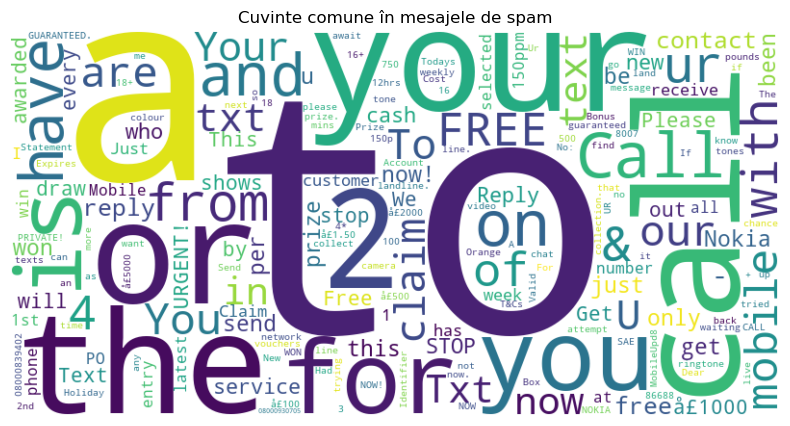

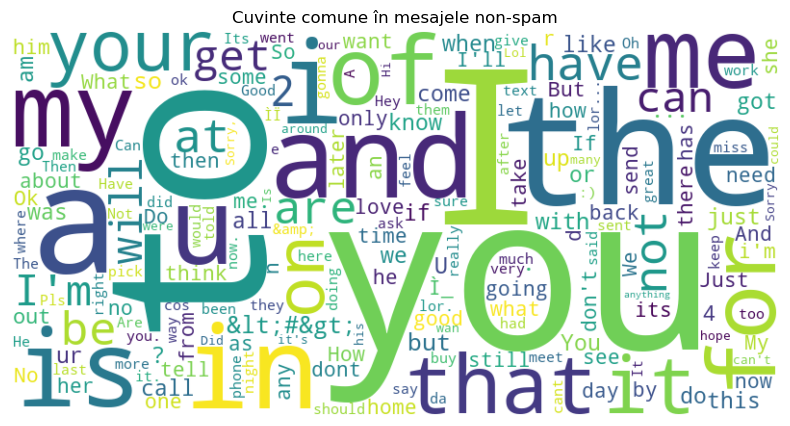

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Încărcați setul de date
df = pd.read_csv('../Data/spam.csv', encoding='latin-1')

# Verificați distribuția claselor
class_distribution = df['v1'].value_counts()
print("Distribuția claselor:\n", class_distribution)

# Grafic de bare pentru distribuția claselor
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=df)
plt.title('Distribuția claselor')
plt.xlabel('Clasă')
plt.ylabel('Număr de mesaje')
plt.show()

# Lungimea mesajelor
df['length'] = df['v2'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='length', hue='v1', bins=50, kde=True)
plt.title('Distribuția lungimii mesajelor')
plt.xlabel('Lungimea mesajului')
plt.ylabel('Frecvența')
plt.show()

# Cuvinte comune în mesajele de spam și non-spam
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

spam_words = ' '.join(df[df['v1'] == 'spam']['v2']).split()
ham_words = ' '.join(df[df['v1'] == 'ham']['v2']).split()

spam_word_freq = Counter(spam_words)
ham_word_freq = Counter(ham_words)

generate_wordcloud(spam_word_freq, 'Cuvinte comune în mesajele de spam')
generate_wordcloud(ham_word_freq, 'Cuvinte comune în mesajele non-spam')


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Încărcare
df = pd.read_csv('../Data/spam.csv', encoding='latin-1')

# Păstrăm doar coloanele relevante
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Verificăm setul de date
print(df.head())
print(df.info())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


C:\Users\Here\AppData\Local\Temp\ipykernel_6472\1085000438.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['label'], palette='viridis')


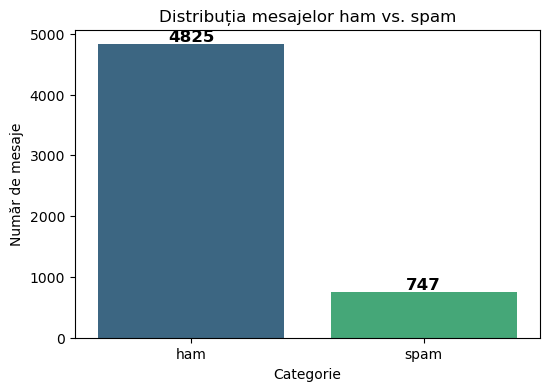

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creăm graficul
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['label'], palette='viridis')

# Adăugăm etichete numerice deasupra fiecărei bare
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convertim la int pentru a elimina .0
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Distribuția mesajelor ham vs. spam")
plt.xlabel("Categorie")
plt.ylabel("Număr de mesaje")
plt.show()


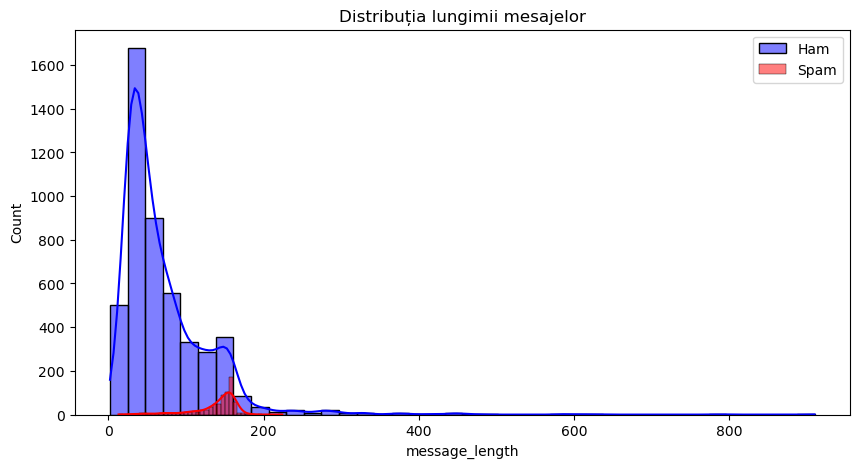

In [22]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df[df['label'] == 'ham']['message_length'], bins=40, color='blue', label='Ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['message_length'], bins=40, color='red', label='Spam', kde=True)
plt.legend()
plt.title('Distribuția lungimii mesajelor')
plt.show()


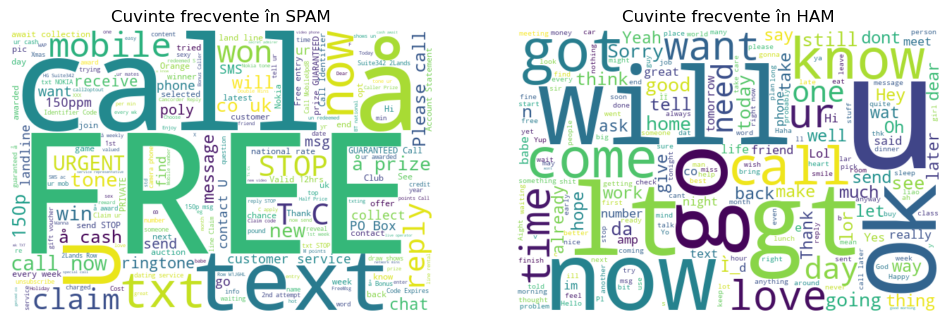

In [23]:
from wordcloud import WordCloud

# Mesaje spam
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)

# Mesaje ham
ham_words = ' '.join(df[df['label'] == 'ham']['message'])
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

# Afișăm word clouds
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(spam_wc, interpolation='bilinear')
ax[0].set_title('Cuvinte frecvente în SPAM')
ax[0].axis('off')

ax[1].imshow(ham_wc, interpolation='bilinear')
ax[1].set_title('Cuvinte frecvente în HAM')
ax[1].axis('off')

plt.show()
